# **Part 1: Data Exploration**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
from google.colab import files
import io

### Load dataset and view random samples

In [6]:
uploaded = files.upload()
df_heart = pd.read_csv(io.BytesIO(uploaded['heart_disease_missing.csv']))

Saving heart_disease_missing.csv to heart_disease_missing (1).csv


In [48]:
df_heart.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
75,58,1,0,145.979414,218.102085,0,1.0,104.952750,0,1.963749,1.0,1,3.136325,0
40,53,0,0,138.003407,233.903679,0,0.0,160.050766,0,-0.002749,2.0,0,2.029197,1
120,46,1,2,149.925040,230.956267,0,1.0,147.087788,0,3.673157,1.0,0,2.075102,0
94,63,0,0,108.063708,269.012648,0,1.0,169.056147,1,1.718888,1.0,2,1.979477,0
149,52,1,0,108.022691,232.987465,1,1.0,146.901590,0,0.196908,2.0,3,2.819865,1


## **Pair Plots**
Generate a “pairs plot” (also called a scatter plot matrix) of the data. From the pair plot, identify the subplots corresponding to the pairs of features where correlation is seen.

In [49]:
bins = ['sex', 'fbs', 'exang']
cats = ['cp', 'restecg', 'slope', 'thal']
ords = ['ca']
nums = ['age', 'oldpeak', 'trestbps', 'chol', 'thalach']
target = ['target']

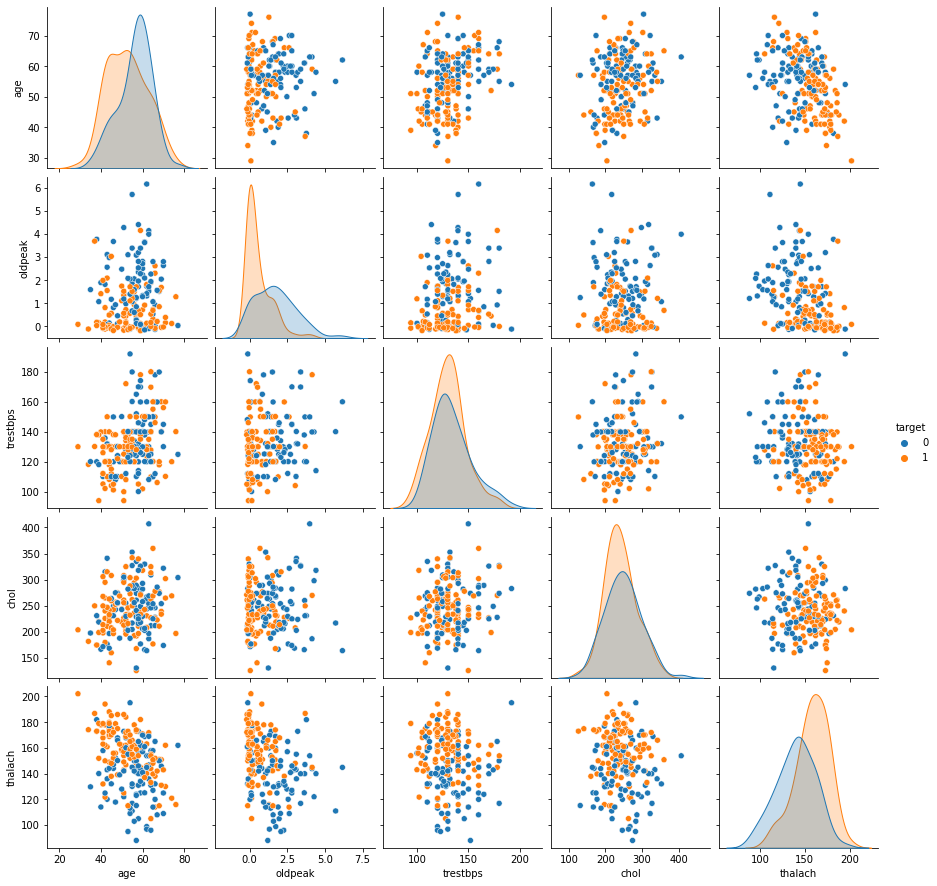

In [50]:
seaborn.pairplot(df_heart, hue="target", vars=nums)
plt.show()

### Comments:
- For scatter plot and correclation coefficient; only numerical data is considered, thus the subset selected for this part inludes [age, oldpeak, trestbps, chol, thalach]

## **Correlation Coefficient**
Calculate and report the correlation coefficient for the pair of features.

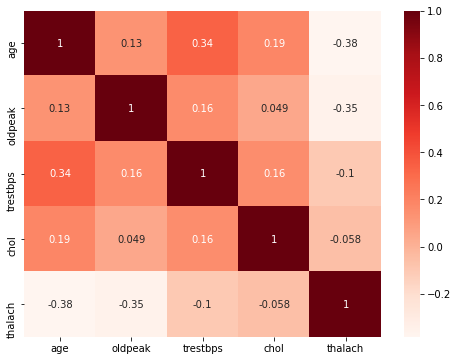

In [51]:
df_heart_features = df_heart[nums]
cor = df_heart_features.corr()
plt.figure(figsize=(8,6))
seaborn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Comments:
- Thalach have negative correlation with age and oldpeak
- Trestbps has positive correlation with age

## **Moments and Boxplots**

Calculate the mean, variance, skew, kurtosis for the datasets and observe the nature of data and the relationships between the features of the dataset.

In [52]:
stats = df_heart_features.describe()
stats.loc['var'] = df_heart_features.var().tolist()
stats.loc['skew'] = df_heart_features.skew().tolist()
stats.loc['kurt'] = df_heart_features.kurtosis().tolist()
print(stats)

              age     oldpeak    trestbps         chol     thalach
count  212.000000  200.000000  205.000000   202.000000  208.000000
mean    54.311321    1.113106  131.784610   244.133256  149.647978
std      9.145339    1.255908   18.057222    46.444257   22.076206
min     29.000000   -0.185668   93.944184   126.085811   88.032613
25%     47.000000    0.050778  119.968114   211.969594  135.946808
50%     55.000000    0.726060  130.010256   241.467023  151.939216
75%     61.000000    1.816733  139.965470   272.484222  165.260092
max     77.000000    6.157114  192.020200   406.932689  202.138041
var     83.637217    1.577304  326.063277  2157.069050  487.358850
skew    -0.106027    1.224053    0.672687     0.333700   -0.394100
kurt    -0.561563    1.363172    0.603542     0.254413   -0.214108


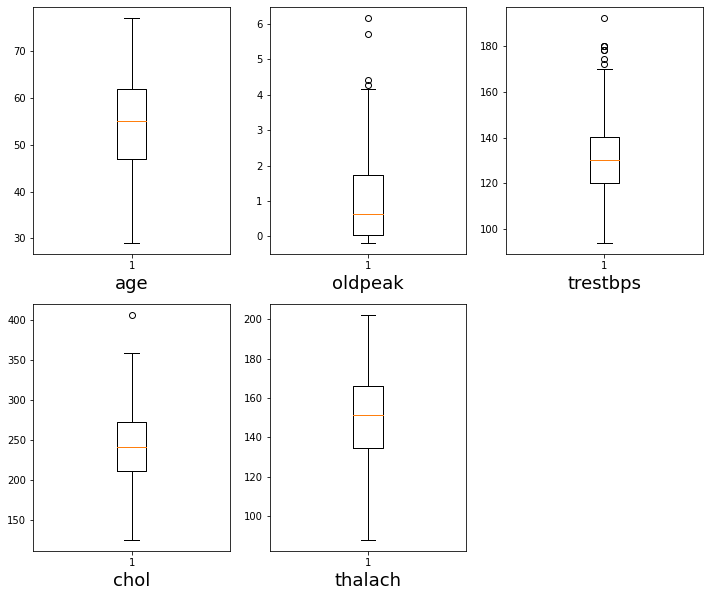

In [53]:
width = 4
height = 5
medianfill_numeric_heart = df_heart_features.dropna()
plt.figure(figsize=(width*3,height*2))

for i, column in enumerate(medianfill_numeric_heart.columns, 1):
    plt.subplot(2,3,i)
    plt.boxplot(medianfill_numeric_heart[column])
    plt.xlabel(column, fontsize=18)

### Comments:
- "oldpeak" has a positive skew
- From count, seems that some columns have missing values, will be removed in data cleaning
- From boxplot; 'oldpeak", "trestbps" and "chol" have outliers, however these values will not be removed as they can be indications for illness

## **Features Grouping and Histgrams**
Group the features by their variable types and plot a histogram of the features to determine the number of present and absent heart disease cases.

Binary:


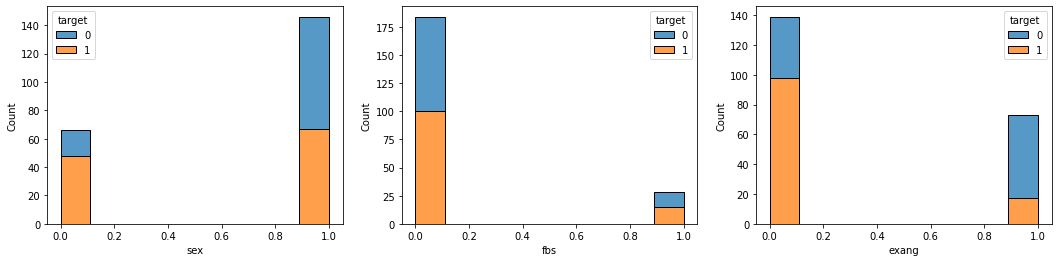

In [54]:
width = 6
height = 4
print("Binary:")
plt.figure(figsize=(width*3,height))

for i, column in enumerate(df_heart[bins].columns, 1):
    plt.subplot(1,3,i)
    seaborn.histplot(df_heart[bins+target],x=column, hue="target", multiple="stack")
plt.show()

Categorical:


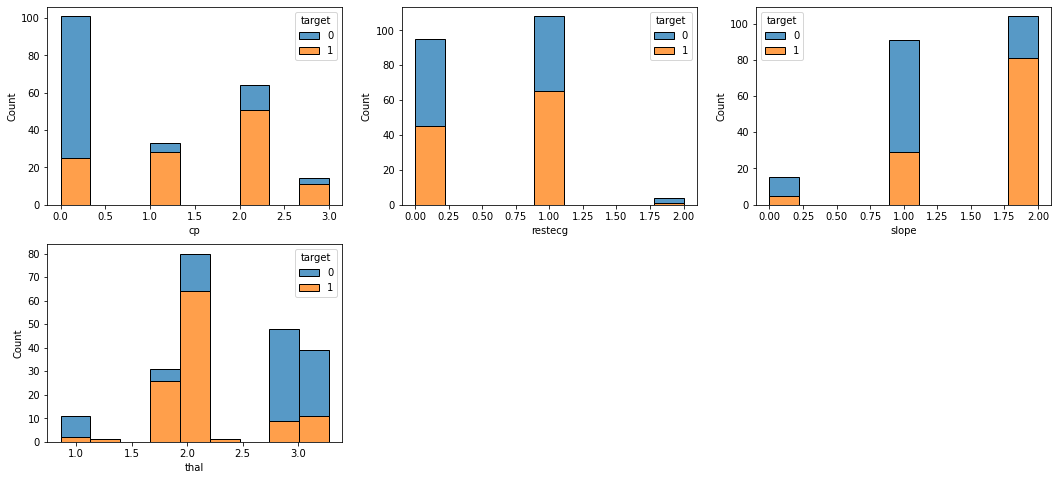

In [55]:
print("Categorical:")
plt.figure(figsize=(width*3,height*2))

for i, column in enumerate(df_heart[cats].columns, 1):
    plt.subplot(2,3,i)
    seaborn.histplot(df_heart[cats+target],x=column, hue="target", multiple="stack")
plt.show()

Ordinal:


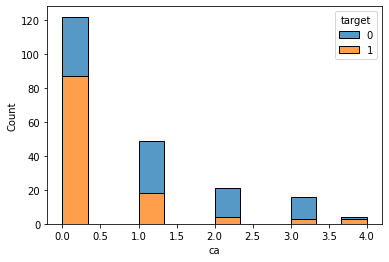

In [56]:
print("Ordinal:")
plt.figure(figsize=(width,height))

for i, column in enumerate(df_heart[ords].columns, 1):
    plt.subplot(1,1,i)
    seaborn.histplot(df_heart[ords+target],x=column, hue="target", multiple="stack")
plt.show()

Numeric:


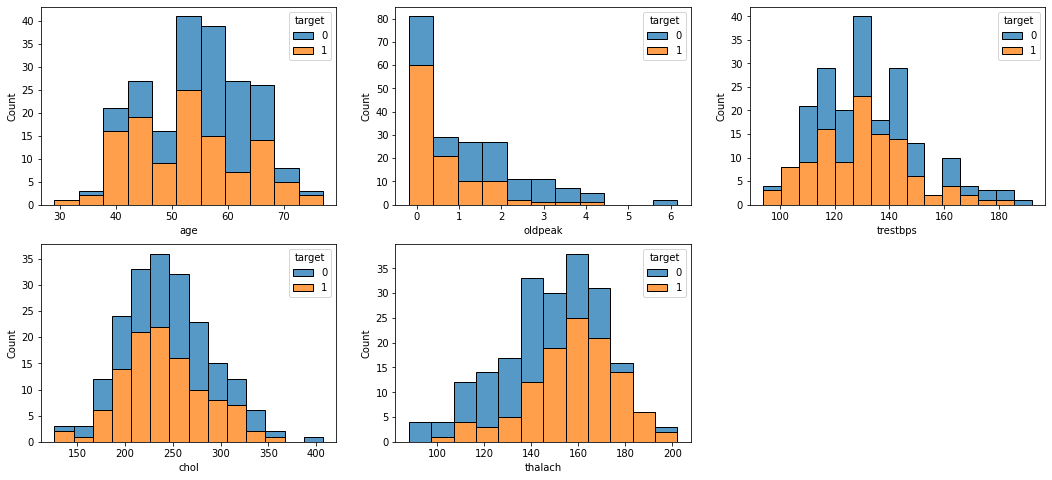

In [57]:
print("Numeric:")
plt.figure(figsize=(width*3,height*2))

for i, column in enumerate(df_heart[nums].columns, 1):
    plt.subplot(2,3,i)
    seaborn.histplot(df_heart[nums+target],x=column, hue="target", multiple="stack")
plt.show()

### Comments:
 - From histograms it is clear that "fbs" and "restecg" values have no effect on the target.
 - From histograms it is clear that 'age', 'sex', 'trestbps', 'chol', have minimal effect on the target
 - 'age', 'sex', 'trestbps', 'chol', 'fbs','restecg' will be dropped in data cleaning
 - "thal" value has some float numbers although it should be intgers only, since it is categorical data ("thal" value will be rounded during data cleaning)

## **Data Cleaning**

In [58]:
from scipy import stats

# Remove "age', 'sex', 'trestbps', 'chol', 'fbs','restecg, as decided from Histograms
colrm_heart = df_heart.drop(['age', 'sex', 'trestbps', 'chol', 'fbs','restecg'], axis=1)

# Round Categorical value
colrm_heart = colrm_heart.round(pd.Series([0, 0, 0, 0], index=cats))

# check for missing values
print("Missing values before removal:\n{}".format(colrm_heart.isnull().sum()))

# Remove rows with missing values
df_heart_clean = colrm_heart.dropna()

# Check for missing values after removal
print("\nMissing values after removing NaNs:\n{}".format(df_heart_clean.isnull().sum()))

# Chack data frame size before and after cleaning
print("\nShape:")
print("Raw dataset before any cleaning:\n{}".format(df_heart.shape))
print("Dataset after cleaning:\n{}".format(df_heart_clean.shape))

Missing values before removal:
cp          0
thalach     4
exang       0
oldpeak    12
slope       2
ca          0
thal        1
target      0
dtype: int64

Missing values after removing NaNs:
cp         0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
target     0
dtype: int64

Shape:
Raw dataset before any cleaning:
(212, 14)
Dataset after cleaning:
(193, 8)


### Applied cleaning for Heart dataset
 - Applied feature selection (Only 7 features selected based on analysis from Histograms)
 - Round categorical values to remove noise
 - Remove rows with missing values

# **Part 2: KNN Classifier**
## **Basic Model:**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [59]:
k = [1, 5, 10, 15, 20, 25, 30, 35]

In [60]:
df_heart_clean.sample(5)

,cp,thalach,exang,oldpeak,slope,ca,thal,target
72,3,124.980398,0,0.105165,2.0,0,2.0,0
75,0,104.952750,0,1.963749,1.0,1,3.0,0
117,0,108.962554,0,2.633414,1.0,3,2.0,0
84,3,174.145214,0,-0.110147,2.0,0,2.0,1
61,0,105.037048,1,0.141274,1.0,1,3.0,1


Encode Categorical Data

In [61]:
df_heart_knn = pd.get_dummies(df_heart_clean, columns=['cp', 'slope', 'thal'])
df_heart_knn.sample(5)

,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,slope_0.0,slope_1.0,slope_2.0,thal_1.0,thal_2.0,thal_3.0
18,153.995359,1,-0.072567,1,1,0,0,1,0,0,0,1,0,0,1
166,144.994986,1,0.673435,1,0,1,0,0,0,0,1,0,0,0,1
153,102.966340,1,1.590912,0,0,1,0,0,0,1,0,0,0,0,1
111,164.769979,0,-0.041466,0,1,0,0,1,0,0,0,1,0,1,0
197,162.980352,0,-0.058812,0,1,0,1,0,0,0,0,1,0,1,0


Divide the data into train, validation, and test sets (60%, 20%, 20%), set the random seed for splitting, use random state=275.

In [62]:
train, set_ = train_test_split(df_heart_knn, test_size=0.4, random_state=275)
validate, test = train_test_split(set_, test_size=0.5, random_state=275)

x_train, y_train = train[train.columns[train.columns != 'target']], train['target']
x_validate, y_validate = validate[validate.columns[validate.columns != 'target']], validate['target']
x_test, y_test = test[test.columns[test.columns != 'target']], test['target']

Train the model with the classifier’s default parameters. Use the train set and test the model on the test set. Store the accuracy of the model.

In [63]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
accuracy_heart_default = metrics.accuracy_score(y_test, prediction)
print("Default: accuracy =",accuracy_heart_default)

Default: accuracy = 0.7435897435897436


Find the best parameters for the classifier:
- Test the following values of k for validation k: {1, 5, 10, 15, 20, 25, 30, 35}.
- Fit the model using the train set.
- Test the model with the validation set. Store the accuracy.
- Plot a figure that shows the validation relationship between the accuracy and the parameter.
- Report the best k in terms of classification accuracy.



In [64]:
accuracy_heart = []

for i in range(len(k)):
  knn = KNeighborsClassifier(n_neighbors=k[i])
  knn.fit(x_train, y_train)
  prediction = knn.predict(x_validate)
  accuracy_heart.append(metrics.accuracy_score(y_validate, prediction))
print(accuracy_heart)

[0.6923076923076923, 0.6666666666666666, 0.6153846153846154, 0.6410256410256411, 0.6410256410256411, 0.6923076923076923, 0.6666666666666666, 0.6410256410256411]


Text(0, 0.5, 'accuracy')

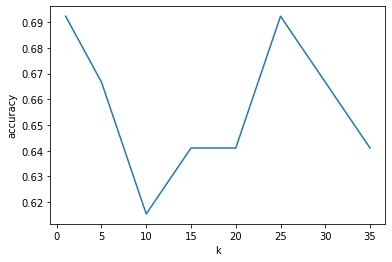

In [65]:
plt.plot(k,accuracy_heart)
plt.xlabel('k')
plt.ylabel('accuracy')

*   Best k: 1



Using the best found parameters, fit the model using the training set and predict the target on the test set.

Report the accuracy, AUC, f-score of the kNN classifier.

In [66]:
k_best = [1]

train, set_ = train_test_split(df_heart_knn, test_size=0.4, random_state=275)
validate, test = train_test_split(set_, test_size=0.5, random_state=275)

x_train, y_train = train[train.columns[train.columns != 'target']], train['target']
x_validate, y_validate = validate[validate.columns[validate.columns != 'target']], validate['target']
x_test, y_test = test[test.columns[test.columns != 'target']], test['target']

for i in range(len(k_best)):
  print('k =',k_best[i],':')
  knn = KNeighborsClassifier(n_neighbors=k_best[i])
  knn.fit(x_train, y_train)
  prediction = knn.predict(x_test)
  print('accuracy =',metrics.accuracy_score(y_test, prediction))
  prediction_proba = knn.predict_proba(x_test)[:, 1]
  print('auc      =',metrics.roc_auc_score(y_test, prediction_proba))
  print('f-score  =',metrics.f1_score(y_test, prediction))
  print()

k = 1 :
accuracy = 0.8205128205128205
auc      = 0.7791666666666667
f-score  = 0.8679245283018867



## **Improved Model:**
Try to improve the classification results using performance metrics by exploring different ways to improve using the validation set.

**Normalization:**

Z-Score normalization is used to prevent outlier from dominating the min-max normalization, and similar points can be treated the same.

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit and transform the data
features = ['thalach','oldpeak']
df_heart_knn[features] = scaler.fit_transform(df_heart_knn[features])
df_heart_knn.sample(5)

,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,slope_0.0,slope_1.0,slope_2.0,thal_1.0,thal_2.0,thal_3.0
38,0.834048,0,-0.874572,1,1,0,1,0,0,0,0,1,0,1,0
176,-0.347613,1,0.074422,0,0,1,0,0,0,0,1,0,0,0,1
115,0.506446,0,-0.932768,0,1,1,0,0,0,0,0,1,0,0,1
46,-0.136209,0,0.348824,1,0,1,0,0,0,0,1,0,0,0,1
160,1.471113,0,-1.029142,0,1,1,0,0,0,0,0,1,0,1,0


**Weighted KNN:**

Use different weighting schemes (default, manhatten, eculidean) to see the effect.

In [68]:
train, set_ = train_test_split(df_heart_knn, test_size=0.4, random_state=275)
validate, test = train_test_split(set_, test_size=0.5, random_state=275)

x_train, y_train = train[train.columns[train.columns != 'target']], train['target']
x_validate, y_validate = validate[validate.columns[validate.columns != 'target']], validate['target']
x_test, y_test = test[test.columns[test.columns != 'target']], test['target']

In [69]:
accuracy_heart_default = []
for i in range(len(k)):
  knn = KNeighborsClassifier(n_neighbors=k[i], weights='distance')
  knn.fit(x_train, y_train)
  prediction = knn.predict(x_validate)
  accuracy_heart_default.append(metrics.accuracy_score(y_validate, prediction))
print('Default:', accuracy_heart_default)

accuracy_heart_manhatten = []
for i in range(len(k)):
  knn = KNeighborsClassifier(n_neighbors=k[i], metric='manhattan', weights='distance')
  knn.fit(x_train, y_train)
  prediction = knn.predict(x_validate)
  accuracy_heart_manhatten.append(metrics.accuracy_score(y_validate, prediction))
print('Manhatten:', accuracy_heart_manhatten)

accuracy_heart_euclidean = []
for i in range(len(k)):
  knn = KNeighborsClassifier(n_neighbors=k[i], metric='euclidean', weights='distance')
  knn.fit(x_train, y_train)
  prediction = knn.predict(x_validate)
  accuracy_heart_euclidean.append(metrics.accuracy_score(y_validate, prediction))
print('Euclidean:', accuracy_heart_euclidean)

accuracy_heart_hamming = []
for i in range(len(k)):
  knn = KNeighborsClassifier(n_neighbors=k[i], metric='hamming', weights='distance')
  knn.fit(x_train, y_train)
  prediction = knn.predict(x_validate)
  accuracy_heart_hamming.append(metrics.accuracy_score(y_validate, prediction))
print('Hamming:', accuracy_heart_hamming)

Default: [0.6923076923076923, 0.717948717948718, 0.7948717948717948, 0.8461538461538461, 0.8205128205128205, 0.8461538461538461, 0.8205128205128205, 0.8205128205128205]
Manhatten: [0.6923076923076923, 0.7692307692307693, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8205128205128205, 0.7948717948717948]
Euclidean: [0.6923076923076923, 0.717948717948718, 0.7948717948717948, 0.8461538461538461, 0.8205128205128205, 0.8461538461538461, 0.8205128205128205, 0.8205128205128205]
Hamming: [0.6923076923076923, 0.7948717948717948, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8205128205128205]


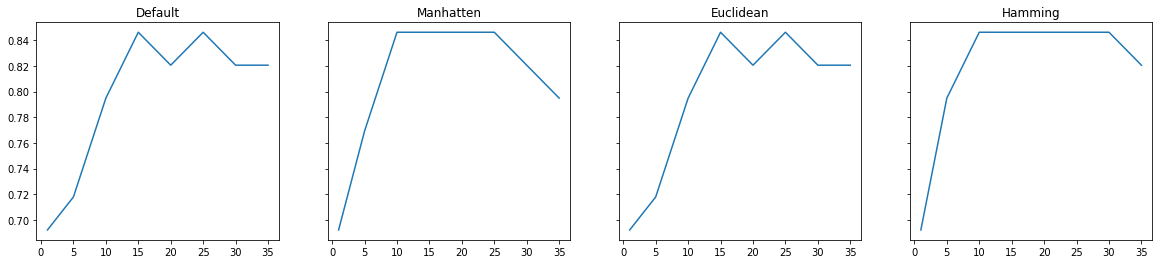

In [70]:
width = 5
height = 4
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(width*4,height))
ax1.plot(k,accuracy_heart_default)
ax1.set_title('Default')
ax2.plot(k,accuracy_heart_manhatten)
ax2.set_title('Manhatten')
ax3.plot(k,accuracy_heart_euclidean)
ax3.set_title('Euclidean')
ax4.plot(k,accuracy_heart_hamming)
ax4.set_title('Hamming')
plt.show()

*   Best metric: Default, Hamming
*   Best k: 15

Compute the new classification results on the test set and report the accuracy, AUC and f-score.

In [78]:
# Choose Hamming
k_best = [15]

train, set_ = train_test_split(df_heart_knn, test_size=0.4, random_state=275)
validate, test = train_test_split(set_, test_size=0.5, random_state=275)

x_train, y_train = train[train.columns[train.columns != 'target']], train['target']
x_validate, y_validate = validate[validate.columns[validate.columns != 'target']], validate['target']
x_test, y_test = test[test.columns[test.columns != 'target']], test['target']

for i in range(len(k_best)):
  print('k =',k_best[i],':')
  knn = KNeighborsClassifier(n_neighbors=k_best[i], metric='hamming', weights='distance')
  knn.fit(x_train, y_train)
  prediction = knn.predict(x_test)
  print('accuracy =',metrics.accuracy_score(y_test, prediction))
  prediction_proba = knn.predict_proba(x_test)[:, 1]
  print('auc      =',metrics.roc_auc_score(y_test, prediction_proba))
  print('f-score  =',metrics.f1_score(y_test, prediction))
  print()

k = 15 :
accuracy = 0.8717948717948718
auc      = 0.9138888888888889
f-score  = 0.8979591836734694



**Basic Model:**
*   k = 1
*   accuracy = 0.8205128205128205
*   auc      = 0.7791666666666667
*   f-score  = 0.8679245283018867


**Improved Model:**
*   k = 15
*   normalization: Z-score
*   knn metric: Hamming
*   accuracy = 0.8717948717948718
*   auc      = 0.9138888888888889
*   f-score  = 0.8979591836734694